
<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `B√∂l√ºm 1` Veri Setine Genel Bakƒ±≈ü ve Analiz


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.1** Google Drive ile Baƒülantƒ± Kurma


* Google Drive ile baƒülantƒ± kuralƒ±m ve veri setini aktaralƒ±m.

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

* Google Drive'dan dosya id'sini alarak y√ºkledik.

In [ ]:
file_id = '1XHqEAeVsLIRCrhxEyT8mzSe1lPH8q-MT'
downloaded = drive.CreateFile({'id': file_id})

# Dosyayƒ± Colabe indirelim.
downloaded.GetContentFile('tweet_data.csv')

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.2** Veri setini y√ºkleyelim ve Analiz edelim.

* Veri analizi i√ßin pandas ve numpy'yi kullanacaƒüƒ±z.

In [ ]:
import pandas as pd
import numpy as np

* Veri setini okuyarak data frame'e aktarƒ±yoruz.

In [ ]:
df = pd.read_csv("tweet_data.csv")

* Sample metodu ile veriler arasƒ±ndan rastgele 10 adet √∂rneƒüi inceleyelim.

In [ ]:
df.sample(10)

#ƒ∞lk Kolon text id'leri i√ßeriyor.
#ƒ∞kinci kolon Tweetleri, √º√ß√ºnc√º kolonda duyguyu i√ßeriyor.

* Tweetlerin toplam sayƒ±sƒ±nƒ± len fonksiyonu ile ekrana yazdƒ±ralƒ±m.


In [ ]:
print("Number of tweets: {}".format(len(df)))

#Veri setinde toplamda 18727 tweet mevcut.

* Bir tweeti ve bu tweetin duygusunu ekrana yazalƒ±m.

In [ ]:
#Belirli bir satƒ±rdaki tweeti yazdƒ±rmak i√ßin iloc metodunu kullanalƒ±m.

tweet_id = 4879
tweet = df.iloc[tweet_id]


In [ ]:
print("Tweet: {}".format(tweet["tweet_text"]))
print("Tweet duygusu: {}".format("sentiment"))

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.3** Veri Setini G√∂rselle≈ütirme

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **1.3.1** Matplotlib</h4>

* Veri setini birde g√∂rsel olarak g√∂relim.Bunun i√ßin matplotlib k√ºt√ºphanesini import edelim.


In [ ]:
import matplotlib.pyplot as plt

* Pozitif ve Negatif Tweetlerin oranƒ±nƒ± Pie chart grafiƒüinde g√∂relim.

In [ ]:
sentiment_count = df["sentiment"].value_counts()
plt.pie(sentiment_count,labels=sentiment_count.index,
        autopct = '%1.1f%%',shadow=True,startangle=140)
plt.show()

#Tweetlerin %52.8'i pozitif, %47.2'si negatif tweetlerden olu≈üuyor.

* Pozitif ve Negatif Tweetlerin sayƒ±sƒ±nƒ± ekranda g√∂relim.

In [ ]:
print("Pozitif Tweetlerin sayƒ±sƒ±: {}".format(df[df["sentiment"]=="positive"].count()[0]))
print("Negatif Tweetlerin sayƒ±sƒ±: {}".format(df[df["sentiment"]=="negative"].count()[0]))

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **1.3.2** Wordclouds

* Wordclouds sƒ±nƒ±fƒ±, b√ºt√ºn corpusta en √ßok tekrar eden kelimelerin √ßoƒüuna hƒ±zlƒ± bir genel bakƒ±≈ü elde etmek i√ßin √ßok kullanƒ±≈ülƒ±dƒ±r.

In [ ]:
from wordcloud import WordCloud

* Pozitif Tweetlerde en √ßok ge√ßen kelimeleri g√∂sterelim.

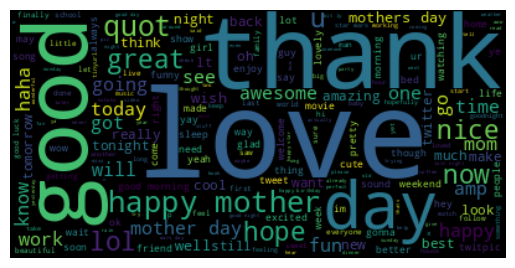

In [ ]:
pos_tweets = df[df["sentiment"]=="positive"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

#≈ûekilde Good,Thank,Love,Happy,Nice gibi kelimelerin pozitif tweetlerde √ßok sayƒ±da ge√ßtiƒüini g√∂r√ºyoruz.

* Negatif Tweetlerde en √ßok ge√ßen kelimelere bakalƒ±m.



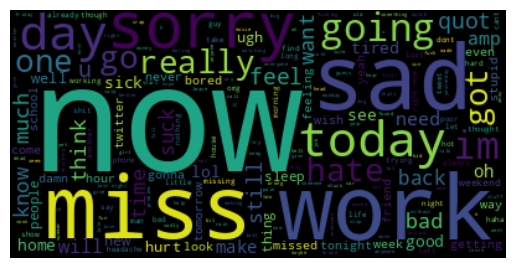

In [ ]:
pos_tweets = df[df["sentiment"]=="negative"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

#≈ûekilde Sad,Miss,Bad,Sorry,Sick gibi kelimelerin en √ßok ge√ßtiƒüini g√∂r√ºyoruz.

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# B√∂l√ºm 2 Text Normalizasyon A≈üamasƒ±

Regexi herhangi bir belirli ifadeyi yakalamak ve deƒüi≈ütirmek i√ßin kullanƒ±lƒ±rƒ±z.

* Regexi import edelim.

In [ ]:
import re

Bir tweeet √∂rneƒüine bakalƒ±m.

In [ ]:
tweet = "RT @Outsider I love this! üëç https://Outsider.com #NLP #Fun"

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.1** RT - Retweet etiketi

* `R` : R karakteri
* `T` : T karakteri
* `\s` :Bo≈üluk karakteri

* ƒ∞lk olarak √ßok bir deƒüeri olmayan retweet ile ba≈ülayalƒ±m. Silebiliriz ya da default bir deƒüer ile deƒüi≈ütirebiliriz.

* Tweeti parametre olarak alan bir metot tanƒ±mlayalƒ±m.Metot return deƒüeri olarak tweeting modifiye edilmi≈ü halini g√∂nderecek.
* Sub fonksiyonu ile tweetin yeni halini create edeceƒüiz.
* Metinde yer alna her RT'yi \s ile bo≈üluk karakteriyle deƒüi≈ütireceƒüiz.


In [ ]:
def replace_retweet(tweet,default_replace=""):
  tweet = re.sub('RT\s+',default_replace,tweet)
  return tweet

In [ ]:
print("ƒ∞≈ülenmi≈ü Tweet: {}".format(replace_retweet(tweet)))

#RT'nin kaybolduƒüunu g√∂r√ºyoruz.

ƒ∞≈ülenmi≈ü Tweet: @Outsider I love this! üëç https://Outsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.2** @User Tag yani Kullanƒ±cƒ± Etiketi

* `\w` : Bir kelime ile deƒüi≈ütirir.

* '@' etiketi ile ba≈ülayan stringleri bulacaƒüƒ±z. Varsayƒ±lan bir kullanƒ±cƒ± etiketi "twitteruser" ile deƒüi≈ütireceƒüiz. Ancak metnin i√ßinde @ ile ba≈ülayan eposta adresi olabilir.Buna dikkat etmek i√ßin \B 'yi ekleyeceƒüiz.
* Yine aynƒ± ≈üekilde bir tweeti alan ve modifiye eden bir metot olu≈üturacaƒüƒ±z.

In [ ]:
def replace_user(tweet,default_replace="twitteruser"):
  tweet = re.sub('\B@\w+',default_replace,tweet)
  return tweet

In [ ]:
print("ƒ∞≈ülenmi≈ü Tweet: {}".format(replace_user(tweet)))

# Kullanƒ±cƒ± etiketini twitteruser ile deƒüi≈ütirdik.

ƒ∞≈ülenmi≈ü Tweet: RT twitteruser I love this! üëç https://Outsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.3** Emojiler

* Emoji sƒ±nƒ±fƒ±nƒ± y√ºkleyelim.

In [ ]:
pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 353.7/353.7 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=ebdd21fc15cc91db3342de33f464152a4271ffce444f9d0f93700372c65ce29c
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae4632803c2ba4a76a71a679eb1383cf590775714e2a21
Successfully built emoji


* Emojiyi import edelim.

In [ ]:
import emoji

* Emojileri anlamlƒ± metinlerle deƒüi≈ütirelim.
* Yine Tweeti input olarak alan ve modifiye edilen tweeti geri d√∂nd√ºren bir metot yazalƒ±m.
* Emoji sƒ±nƒ±fƒ±ndan demoji metodu sayesinde emojiyi anlamƒ±na g√∂re bir metinle deƒüi≈ütirecek.

In [ ]:
def demojize(tweet):
  tweet=emoji.demojize(tweet)
  return tweet

In [ ]:
print("ƒ∞≈ülenmi≈ü Tweet: {}".format(demojize(tweet)))

#üëç emojisi yerine thumbs up yazdƒ±.

ƒ∞≈ülenmi≈ü Tweet: RT @Outsider I love this! :thumbs_up: https://Outsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.4** URL'ler

* `\S` : Bo≈üluk karakteri hari√ß bir karakter.

* URL'ler g√ºvenli olmayan Web sayfalarƒ± i√ßin http ve g√ºvenlik sayfalarƒ± i√ßin https formlarƒ±nda bulunurlar.
* Bunlarƒ± aynƒ± RT'de olduƒüu gibi yine ortadan kaldƒ±racaƒüƒ±z.

In [ ]:
def replace_url(tweet,default_replace=""):
  tweet=re.sub('(http|https):\/\/\S+',default_replace,tweet)
  return tweet

In [ ]:
print("ƒ∞≈ülenmi≈ü Tweet: {}".format(replace_url(tweet)))

#G√∂r√ºld√ºƒü√º gibi URL temizlendi.

ƒ∞≈ülenmi≈ü Tweet: RT @Outsider I love this! üëç  #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.5** Hashtagler

* Hasthag ile ba≈ülayan herhangi bir ≈üeyin ba≈üƒ±ndaki hashtag (#) simgesini kaldƒ±racaƒüƒ±z.

In [ ]:
def replace_hashtag(tweet,default_replace=""):
  tweet=re.sub('#+',default_replace,tweet)
  return tweet

In [ ]:
print("ƒ∞≈ülenmi≈ü Tweet: {}".format(replace_hashtag(tweet)))

ƒ∞≈ülenmi≈ü Tweet: RT @Outsider I love this! üëç https://Outsider.com NLP Fun


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.2** Kelime √ñzellikleri
Twitter'a baƒülƒ± olmayan bazƒ± diƒüer √∂zelliklere bir g√∂z atalƒ±m.

In [ ]:
tweet = "LOOOOOOOOK at this ... I'd like it so much!"

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.1** B√ºy√ºk harf kullanƒ±mƒ±nƒ± kaldƒ±rarak her harfi k√º√ß√ºltelim.

* Tweeti input alan ve tweette yer alan her harfi k√º√ß√ºlten bir metot yazalƒ±m.

In [ ]:
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

In [ ]:
print("ƒ∞≈ülenmi≈ü Tweet: {}".format(to_lowercase(tweet)))

ƒ∞≈ülenmi≈ü Tweet: looooooook at this ... i'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.2** Kelime tekrarƒ±

* S√∂zc√ºk tekrarlarƒ±nƒ± tek bir olu≈üumla deƒüi≈ütirelim. ("oooooo", "oo" olacak)
* Bu durumda olduƒüu gibi bir√ßok karakter tekrarƒ±nƒ±n kolay bir yolu var.
* 1+ diyerek tekrarlanan grubun herhangi √ßift harfle deƒüi≈üeceƒüini belirtiriz.
* ƒ∞lk 1\, yakalama grubunun i√ßeriƒüiyle e≈üle≈üeni belirtmek i√ßin kullanƒ±lƒ±r ve ikinci 1\, e≈üle≈ümeyi tek bir olu≈üumla deƒüi≈ütirmek i√ßin kullanƒ±lƒ±r.

In [ ]:
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+',r'\1\1',tweet)
  return tweet

In [ ]:
print("ƒ∞≈ülenmi≈ü tweet: {}".format(word_repetition(tweet)))
#G√∂r√ºld√ºƒü√º gibi LOOK'ta sadece 2 tane O kaldƒ±.

ƒ∞≈ülenmi≈ü tweet: LOOK at this .. I'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.3** Noktalama tekrarƒ±

* Noktalama tekrarlarƒ±nƒ± aynƒ± harflerde olduƒüu gibi tek bir olu≈üumla deƒüi≈ütirelim. ("!!!!!" => "!" olacak)
* E≈üle≈ütirmek istediƒüimiz t√ºm farklƒ±la≈ümalarƒ± bir ters eƒüik √ßizgi \n ile belirtebiliriz.

In [ ]:
def punct_repetition(tweet,default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])',default_replace,tweet)
  return tweet

In [ ]:
print("ƒ∞≈ülenmi≈ü Tweet: {}".format(punct_repetition(tweet)))

#.. ≈üeklinde olan noktalardan sadece tek bir adet nokta kaldƒ±.

ƒ∞≈ülenmi≈ü Tweet: LOOOOOOOOK at this . I'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.4** Kelime Daralmasƒ±

* isn't, wasn't, won't ≈üeklinde yer alan kƒ±sa kullanƒ±mlarƒ± is not,was not,will not gibi a√ßƒ±k halleriyle yazacaƒüƒ±z.

* Bunun i√ßin Contractions sƒ±nƒ±fƒ±nƒ± indirelim ve import edelim.

In [ ]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 289.9/289.9 kB 20.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 110.8/110.8 kB 11.7 MB/s eta 0:00:00


In [ ]:
import contractions

*`contractions_dict` ingilizcedeki √ßoƒüu kƒ±saltmayƒ± i√ßeren bir s√∂zl√ºk yapƒ±sƒ±.

In [ ]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn‚Äôt': 'did not', "don't": 'do not', 'don‚Äôt': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are

* Bu t√ºr kƒ±saltmalarƒ± kaldƒ±rmasƒ± i√ßin iki ≈üekilde metot yazabiliriz.Birisi uzun yol diƒüeri daha kƒ±sa bir yol.

In [ ]:
def _fix_contractions(tweet):
  for k,v in contractions.contractions_dict.items():
    tweet = tweet.replace(k,v)
  return tweet

In [ ]:
print("ƒ∞≈ülenmi≈ü Tweet: {}".format(_fix_contractions(tweet)))

ƒ∞≈ülenmi≈ü Tweet: LOOOOOOOOK at this ... I would like it so much!


* contractions.fix hazƒ±r metodu sayesinde bu i≈ülemi kolayca yapabiliyoruz.

In [ ]:
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet

In [ ]:
print("ƒ∞≈ülenmi≈ü Tweet: {}".format(fix_contractions(tweet)))

#I'd like ile yerine a√ßƒ±k hali olan I would like'ƒ± deƒüi≈ütirmi≈ü olduk.

ƒ∞≈ülenmi≈ü Tweet: LOOOOOOOOK at this ... I would like it so much!


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.3** Tokenizasyon

* Tokenizasyon, karma≈üƒ±k ve uzun c√ºmleleri bilgisayarlar ve makine √∂ƒürenimi modelleri tarafƒ±ndan daha kolay anla≈üƒ±lan daha k√º√ß√ºk par√ßalara d√∂n√º≈üt√ºrmenin etkili bir yoludur.

* NLTK paketini y√ºkleyelim.

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.3.1** Basit Tokenization

* nltk'yƒ± ve word_tokenize mod√ºl√ºn√º import edelim.

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tweet = "These are 5 different words!"

* Tokenizasyon i≈ülemi yapan bir metot olu≈üturalƒ±m.
* word_tokenize mod√ºl√º ile basit bir ≈üekilde tokenizasyon i≈ülemini ger√ßekle≈ütirebiliyoruz.

In [ ]:
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens


* tokenize() fonksiyonu ile tweet'in tokenizasyon i≈ülemine girdikten sonraki halini g√∂rebiliyoruz.
* √áƒ±ktƒ± olarak tokenleri bir liste i√ßinde g√∂rebiliyoruz.

In [ ]:
print(type(tokenize(tweet)))
print("Tweet tokenleri: {}".format(tokenize(tweet)))

<class 'list'>
Tweet tokenleri: ['These', 'are', '5', 'different', 'words', '!']


* Bazen bazƒ± belirli √∂ƒüeleri bir c√ºmlede tutmak veya tersine, onlardan kurtulmak isteyebiliriz.
* Bunlar √∂rneƒüin noktalama i≈üaretleri, durma s√∂zc√ºkleri(stopwords) ve hatta bazƒ± durumlarda sayƒ±lar i√ßin ge√ßerlidir.

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.3.2** √ñzel Tokenizasyon

* String paketini import edelim.

In [ ]:
import string

* String paketi ile punctuation sayesinde var olan t√ºm noktalama i≈üaretlerini alabiliriz.

In [ ]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


* NLTK'dan stopwords mod√ºl√ºn√º import edelim ve stopwordleri indirelim.
* Bu i≈ülem sayesinde ingilizcede kullanƒ±lan t√ºm stopwordslere bir liste halinde eri≈üebiliyoruz.


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

* Stopwordleri bir k√ºme haline getirelim.

In [ ]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'me', 'had', 'with', 'some', 'on', 'hers', 'of', 'into', 'above', 'this', 'not', 'now', "weren't", 'as', 'my', 'after', 'hasn', "mustn't", 'those', "doesn't", 'here', 'because', 'theirs', 'o', 'all', 'don', "you'd", 'yours', 'ain', 'so', 'y', 'myself', 'then', 'weren', 'themselves', 'didn', 'from', 'shouldn', "should've", 'who', 'it', 'down', 'doing', 'that', 'ours', 'are', 'at', 'was', 'their', 'won', 'which', 'few', 'own', "didn't", 'under', 're', "mightn't", "hasn't", 'an', 'both', 'aren', 'about', 'be', 'if', 'once', 'you', 'll', 'where', 'a', 'does', 'mustn', 'most', 'or', 'doesn', 'his', 'do', 'hadn', "you'll", 'am', 'while', 'each', 'wouldn', 'more', 'did', "shan't", 'its', "you've", 'nor', 'through', 't', 'them', 'needn', 'in', 'can', 'until', 'further', 'only', 'i', 'between', "aren't", 'himself', 'when', 'other', "don't", 'and', 'any', 'isn', 'to', 'were', 'itself', 'what', 'has', 'ma', 'up', 'whom', "that'll", "you're", 'been', 'yourself', 'shan', "couldn't", 'will', 'too',

* K√ºmeden bazƒ± stopwordleri √ßƒ±kartalƒ±m. √á√ºnk√º "not" gibi bir kelime c√ºmlenin anlamƒ±nƒ± olumsuz y√∂nde deƒüi≈ütirebilir. O y√ºzden c√ºmleden √ßƒ±kartmak √ßok yanlƒ±≈ü olur.
* Discard fonksiyonu ile k√ºmeden √ßƒ±kartalƒ±m. Bu sayede artƒ±k not kelimesi c√ºmleden atƒ±lmayacak.

In [ ]:
stop_words.discard('not')
print(stop_words)

{'me', 'had', 'with', 'some', 'on', 'hers', 'of', 'into', 'above', 'this', 'now', "weren't", 'as', 'my', 'after', 'hasn', "mustn't", 'those', "doesn't", 'here', 'because', 'theirs', 'o', 'all', 'don', "you'd", 'yours', 'ain', 'so', 'y', 'myself', 'then', 'weren', 'themselves', 'didn', 'from', 'shouldn', "should've", 'who', 'it', 'down', 'doing', 'that', 'ours', 'are', 'at', 'was', 'their', 'won', 'which', 'few', 'own', "didn't", 'under', 're', "mightn't", "hasn't", 'an', 'both', 'aren', 'about', 'be', 'if', 'once', 'you', 'll', 'where', 'a', 'does', 'mustn', 'most', 'or', 'doesn', 'his', 'do', 'hadn', "you'll", 'am', 'while', 'each', 'wouldn', 'more', 'did', "shan't", 'its', "you've", 'nor', 'through', 't', 'them', 'needn', 'in', 'can', 'until', 'further', 'only', 'i', 'between', "aren't", 'himself', 'when', 'other', "don't", 'and', 'any', 'isn', 'to', 'were', 'itself', 'what', 'has', 'ma', 'up', 'whom', "that'll", "you're", 'been', 'yourself', 'shan', "couldn't", 'will', 'too', 'might

* Artƒ±k tokenizasyon i≈ülemine hazƒ±rƒ±z.
* Bunun i√ßin tokenizasyon fonksiyonu olu≈üturalƒ±m.

In [ ]:
#Yine tokenize fonksiyonu kullarak tokenlerin bir listesini alƒ±yoruz.
#Hangi tokenlerin kalacaƒüƒ±na veya kalmayacaƒüƒ±na karar vereceƒüiz.

#keep_punct'ƒ±n False olmasƒ± noktalama i≈üaretlerini istemiyoruz demektir.

#Alnum, sayƒ±lar ve harfleri temsil ediyor. False yaptƒ±ƒüƒ±mƒ±zda sayƒ±lar dahil olmayacak.
#Eƒüer true yapsaydƒ±k sayƒ±larƒ±da token listesinde tutacaktƒ±.

def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  token_list = word_tokenize(tweet)

  #Token listesinden noktalama i≈üaretlerini atalƒ±m.
  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]
  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]

  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list


* Fonksiyonu bir tweet ile 3 farklƒ± ≈üekilde test edelim.

In [ ]:
tweet = "these are 5 different words!"

In [ ]:
#ƒ∞lkinde noktalama i≈üaretleri, sayƒ±lar ve stopwordler True olarak g√∂nderildiƒüinden t√ºm hepsini yazdƒ±.

#ƒ∞kinci √∂rnekte noktalama i≈üaretleri ve sayƒ±lar default olarak false olduƒüu i√ßin onlarƒ± kaldƒ±rdƒ±, stopwordler kaldƒ±.

#√ú√ß√ºnc√º √∂rnekte ise sayƒ±larƒ± tutmak i√ßin True olarak g√∂nderdi. Noktalamala i≈üaretleri ve stopwordler kaldƒ±rƒ±ldƒ±.

#C√ºmledeki stopwordler: These ve are

print("Tweet tokens: {}".format(custom_tokenize(tweet,
                                                keep_punct=True,
                                                keep_alnum=True,
                                                keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_alnum=True)))

Tweet tokens: ['these', 'are', '5', 'different', 'words', '!']
Tweet tokens: ['these', 'are', 'different', 'words']
Tweet tokens: ['5', 'different', 'words']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.4** Stemming

* Stemming i√ßin bazƒ± k√ºt√ºphaneleri ve mod√ºlleri import edelim.

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

* Stemming yapacaƒüƒ±mƒ±z tokenlerin listesi.

In [ ]:
tokens = ["manager", "management", "managing"]

* Daha sonra, her bir stemmer i√ßin bir tane olmak √ºzere deƒüi≈ükenler olu≈üturabilir ve bunlarƒ± az √∂nce y√ºklediƒüimiz farklƒ± mod√ºllerle atayabiliriz.

In [ ]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snoball_stemmer = SnowballStemmer('english')

* Parametre olarak Token listesini alan ve stemming i≈üleminden ge√ßen tokenlarƒ± geri d√∂nd√ºren bir metot olu≈üturalƒ±m.

In [ ]:
#Bo≈ü bir liste olu≈üturup stemming yapƒ±lan tokenleri ekliyoruz.

def stem_tokens(tokens,stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

* Farklƒ± Stemming y√∂ntemleriyle stemming yapƒ±lmƒ±≈ü tokenleri kar≈üƒ±la≈ütƒ±ralƒ±m.

In [ ]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

#Porter stemmer ve Snowball stemmer aynƒ± sonu√ßlarƒ± √ºretti.
#Lancaster stemming, Porter stemming y√∂nteminden daha agresif bir ≈üekilde kelime k√∂klerini √ßƒ±karmak i√ßin kullanƒ±lƒ±r.
#Ancak, Lancaster stemming y√∂nteminin dezavantajlarƒ± da vardƒ±r.
#√áok agresif bir y√∂ntem olduƒüu i√ßin, kelime k√∂klerini yanlƒ±≈ü ≈üekilde kestirebilir ve kelimenin anlamƒ±nƒ± deƒüi≈ütirebilir.


Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.5** Lemmatizasyon

* Lemmatizasyon i√ßin k√ºt√ºphaneleri ve mod√ºlleri import edelim.
*WordNet, Princeton √úniversitesi tarafƒ±ndan geli≈ütirilen √ßok geni≈ü bir s√∂zc√ºk veri tabanƒ±dƒ±r.
*200'den fazla dilde binlerce kelimeyi kapsar ve lemmatizasyon yetenekleri sunar

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

* Lemmatizasyon yapacaƒüƒ±mƒ±z tokenlerin listesini olu≈üturalƒ±m.

In [ ]:
tokens = ["international", "companies", "had", "interns"]

* Kelimeleri isim,sƒ±fat,fiil ≈üeklinde s√∂zc√ºk t√ºrlerine ayƒ±ralƒ±m.

In [ ]:
word_type = {"international": wordnet.ADJ,
             "companies": wordnet.NOUN,
             "had": wordnet.VERB,
             "interns": wordnet.NOUN
             }

* WordNet mod√ºl√ºnden lemmatizer fonksiyonunu kullanalƒ±m.

In [ ]:
lemmatizer = WordNetLemmatizer()

* Tokenleri parametre olarak alan ve lemmatizasyon i≈üleminden ge√ßirip geri d√∂nd√ºren bir metot olu≈üturalƒ±m.

In [ ]:
def lemmatize_tokens(tokens,word_type,lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token,word_type[token]))
  return token_list

In [ ]:
print("Tweet lemma: {}".format(
    lemmatize_tokens(tokens, word_type, lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']


* Yaptƒ±ƒüƒ±mƒ±z t√ºm normalizasyon i≈ülemlerini tek bir metotta tanƒ±mlayalƒ±m.

In [ ]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Tweetin ilk hali: {}".format(tweet))

  ## Twitter √ñzellikleri
  tweet = replace_retweet(tweet) # Retweet i√ßin olan kƒ±sƒ±m
  tweet = replace_user(tweet, "") # Kullanƒ±cƒ± etiketi
  tweet = replace_url(tweet) # Url'leri i√ßeren kƒ±sƒ±m
  tweet = replace_hashtag(tweet) # Hashtagler i√ßin olan kƒ±sƒ±m
  if verbose: print("Twitter i≈ülemlerinden sonra tweet: {}".format(tweet))

  ## Kelime √ñzellikleri
  tweet = to_lowercase(tweet) # Harfleri k√º√ß√ºltmek i√ßin
  tweet = fix_contractions(tweet) # Kƒ±saltmalar i√ßin
  tweet = punct_repetition(tweet) # Noktalama i≈üaretlerinin tekrarƒ± i√ßin
  tweet = word_repetition(tweet) # kelime tekrarƒ±nƒ± i√ßin
  tweet = demojize(tweet) # Emojileri deƒüi≈ütirmek i√ßin
  if verbose: print("Kelime i≈ülemlerinden sonra tweet: {}".format(tweet))

  ## Tokenizasyon & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenizasyon
  stemmer = SnowballStemmer("english") # Stemmerƒ± tanƒ±mlayalƒ±m.
  stem = stem_tokens(tokens, stemmer) # stemming tokenleri

  return stem

* Duygu analizi i√ßin yeterince hƒ±zlƒ± ve etkili olduƒüu i√ßin Lemmatizasyon yerine Stemmingi kullanacaƒüƒ±m.

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `B√∂l√ºm 3` Metnin Yeniden Temsili </h2>

* Scikit-Learn k√ºt√ºphanesini indirelim.
* Scikit-Learn √ße≈üitli sƒ±nƒ±flandƒ±rma,regresyon ve k√ºmeleme algoritmalarƒ± i√ßeren bir makine √∂ƒürenmesi kitaplƒ±ƒüƒ±dƒ±r.

In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


* Veri setine 2 yeni kolon ekleyelim.ƒ∞lki tweetin tokenlere ayrƒ±lmƒ±≈ü hali.
* ƒ∞kinci ekleyeceƒüimiz kolonda, Tweet eger pozitifse 1, negatif ise 0 olarak ekleyelim. Bu sayede 1 ve 0'lar bilgisayar tarafƒ±ndan kullanƒ±labilecek.


In [ ]:
df["tokens"] = df["tweet_text"].apply(process_tweet)
df["tweet_sentiment"] = df["sentiment"].apply(lambda i: 1
                                              if i == "positive" else 0)
df.head(10)

textID                                         tweet_text sentiment  \
0  1956967666  Layin n bed with a headache  ughhhh...waitin o...  negative   
1  1956967696                Funeral ceremony...gloomy friday...  negative   
2  1956967789               wants to hang out with friends SOON!  positive   
3  1956968477  Re-pinging @ghostridah14: why didn't you go to...  negative   
4  1956968636               Hmmm. http://www.djhero.com/ is down  negative   
5  1956969035            @charviray Charlene my love. I miss you  negative   
6  1956969172         @kelcouch I'm sorry  at least it's Friday?  negative   
7  1956969531                            Choked on her retainers  negative   
8  1956970047  Ugh! I have to beat this stupid song to get to...  negative   
9  1956970424  @BrodyJenner if u watch the hills in london u ...  negative   

                                              tokens  tweet_sentiment  
0                     [layin, n, bed, headach, call]                0  
1                                    [funer, friday]                0  
2                         [want, hang, friend, soon]                1  
3             [not, go, prom, bf, not, like, friend]                0  
4                                              [hmm]                0  
5                              [charlen, love, miss]                0  
6                             [sorri, least, friday]                0  
7                                    [choke, retain]                0  
8         [ugh, beat, stupid, song, get, next, rude]                0  
9  [watch, hill, london, realis, tourtur, week, w...                0

* ≈ûimdi data frame'i girdiler ve √ßƒ±ktƒ±lar olarak iki listeye ayƒ±ralƒ±m.

* ƒ∞lki tweet tokenlerini i√ßeren liste : X
* ƒ∞kincisi duygularƒ± i√ßeren liste : Y







In [ ]:
X = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()

In [ ]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['not', 'go', 'prom', 'bf', 'not', 'like', 'friend'], ['hmm'], ['charlen', 'love', 'miss'], ['sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'school', 'time', 'sleep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['annoy', 'start', '

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.2** Pozitif/Negatif Frekanslar

* ƒ∞lk olarak Pozitif/Negatif Frekanslar tekniƒüini kullanacaƒüƒ±z.

In [ ]:
corpus = [["i", "love", "nlp"],
          ["i", "miss", "you"],
          ["i", "love", "you"],
          ["you", "are", "happy", "to", "learn"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

sentiment = [1, 0, 1, 1, 0, 0]

* ƒ∞ndeks olarak kelime,duygu ve deƒüer olarak bu belirli duygu i√ßindeki olu≈üum ile bir s√∂zl√ºk olarak saklanacak olan frekans tablomuzu olu≈üturmamƒ±z gerekiyor.


* Tweetlerin listesini ve duygularƒ±nƒ± bir metot olu≈üturalƒ±m.
* Geriye Frekanslarƒ± s√∂zl√ºk halinde d√∂nd√ºrecek.


<table style="width:100%">
  <tr>
    <th>Word</th>
    <th>Positive</th>
    <th>Negative</th>
  </tr>
  <tr>
    <td>love</td>
    <td>dict[(love, 1)]</td>
    <td>dict[(love, 0)]</td>
  </tr>
  <tr>
    <td>lost</td>
    <td>dict[(lost, 1)]</td>
    <td>dict[(lost, 0)]</td>
  </tr>
  <tr>
    <td>happy</td>
    <td>dict[(happy, 1)]</td>
    <td>dict[(happy, 0)]</td>
  </tr>
</table>


In [ ]:
#Bo≈ü bir s√∂zl√ºk olu≈üturalƒ±m.
#Tweetleri ve duygularƒ± d√∂ng√º i√ßinde alalƒ±m.
#Tweetten tek tek s√∂zc√ºkleri alƒ±yoruz.
#Aldƒ±ƒüƒ±mƒ±z s√∂zc√ºkleri duygularla e≈üle≈ütiriyoruz.
#√ñrneƒüin g√ºzel kelimesini pozitif gibi.
#Eƒüer s√∂zl√ºƒü√ºm√ºzde bu kelime daha √∂nce ge√ßmi≈üse 1 artƒ±rƒ±yoruz.
#Ge√ßmemi≈üse s√∂zl√ºƒüe 1 olarak ekliyoruz.

def build_freqs(tweet_list, sentiment_list):
  freqs = {}
  for tweet, sentiment in zip(tweet_list, sentiment_list):
    for word in tweet:
      pair = (word, sentiment)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1
  return freqs

* Frekans s√∂zl√ºƒü√ºm√ºz√º corpus ve duygularƒ± g√∂ndererek olu≈üturalƒ±m.

In [ ]:
freqs = build_freqs(corpus, sentiment)

In [ ]:
print(freqs)

# S√∂zl√ºƒü√ºm√ºz index olarak kelimeyi ve duyguyu, value yani deƒüer olarak ise frekansƒ± i√ßeriyor.
# √ñrneƒüin i kelimesi pozitif tweetlerde 2 kere, negatif tweetlerde 3 kere ge√ßmi≈ü.

{('i', 1): 2, ('love', 1): 2, ('nlp', 1): 1, ('i', 0): 3, ('miss', 0): 1, ('you', 0): 1, ('you', 1): 2, ('are', 1): 1, ('happy', 1): 1, ('to', 1): 1, ('learn', 1): 1, ('lost', 0): 1, ('my', 0): 1, ('computer', 0): 1, ('am', 0): 1, ('so', 0): 1, ('sad', 0): 1}


* T√ºm veri setine dayalƒ± olarak bir frekans s√∂zl√ºƒü√º olu≈üturalƒ±m.

In [ ]:
freqs_all = build_freqs(X, y)

* Love kelimesinin pozitif ve negatif tweetlerde ka√ßar kez ge√ßtiƒüine bakalƒ±m.
* Love kelimesi 1358 kez pozitif tweetlerde kar≈üƒ±mƒ±za √ßƒ±karken, yalnƒ±z 67 kez negatif tweetlerde kar≈üƒ±mƒ±za √ßƒ±kmƒ±≈ü

In [ ]:
print("Love kelimesinin pozitif tweetlerde frekansƒ±: {}".format(freqs_all[("love", 1)]))
print("Love kelimesinin negatif tweetlerde frekansƒ±: {}".format(freqs_all[("love", 0)]))

Love kelimesinin pozitif tweetlerde frekansƒ±: 1358
Love kelimesinin negatif tweetlerde frekansƒ±: 67


* Frekans s√∂zl√ºƒü√ºn√º kullanarak tweetleri 2 boyutlu diziye √ßeviren bir metot olu≈üturalƒ±m.

In [ ]:
#Diziyi yeni veya bilinmeyen tweetler olabileceƒüi i√ßin √∂ncelikle 0 olarak ba≈ülatƒ±yoruz.
#Sonra tweetteki her kelimeyi d√∂ng√ºye alƒ±yoruz.
#Ve kelimelerin s√∂zl√ºkte pozitif bir duyguyla g√∂r√ºn√ºp g√∂r√ºnmediƒüini kontrol ediyoruz.
#Eƒüer b√∂yleyse yeni dizimizin birinci boyutuna s√∂zl√ºkte var olan olu≈üum t√ºr√ºn√º ekleyebiliriz.
#Aynƒ± ≈üeyi negatif durum i√ßinde yapƒ±yoruz.
#Eƒüer kelime negatifse bunu dizimizin 2.boyutuna ekliyoruz.

def tweet_to_freq(tweet, freqs):
  x = np.zeros((2,))
  for word in tweet:
    if (word, 1) in freqs:
      x[0] += freqs[(word, 1)]
    if (word, 0) in freqs:
      x[1] += freqs[(word, 0)]
  return x

* Bu ≈üekilde, tweetteki her kelimeye baktƒ±k, kelimenin corpusta pozitif ve negatif tweet'lerinde ne sƒ±klƒ±kta ge√ßtiƒüini ve bazƒ±larƒ±nƒ±n dizimizdeki sonucunu kontrol ettik.

* Olu≈üturduƒüumuz tweet_to_freqs fonksiyonu ve corpus s√∂zl√ºƒü√ºm√ºzle 2 boyutlu vekt√∂r olu≈üturalƒ±m.

In [ ]:
print(tweet_to_freq(["i", "love", "nlp"], freqs))

#I kelimesi corpusumuzda 2 kez pozitif tweetlerde, 3 kezde negatif tweetlerde yer alƒ±yordu.
#Love kelimesi 2 kez pozitif tweetlerde yer alƒ±rken negatif tweetlerde hi√ß yer almƒ±yordu.
#Nlp kelimesi ise 1 kez pozitif tweetlerde yer alƒ±rken yine negatif tweetlerde hi√ß yer almƒ±yordu.

#ƒ∞lk boyutta 2+2+1 = 5, ƒ∞kinci boyutta ise 3+0+0 = 3

#Vekt√∂r√ºm√ºz [5,3] ≈üeklinde olacaktƒ±r.

[5. 3.]


* B√ºt√ºn veri setini kullanarak bu kelimeleri 2 boyutlu vekt√∂r ≈üeklinde g√∂relim.

In [ ]:
print(tweet_to_freq(["i", "love", "nlp"], freqs_all))

[1358.   67.]


* Bir grafik √ºzerinde 2 kelimenin nerelerde g√∂z√ºkt√ºƒü√ºne bakalƒ±m.

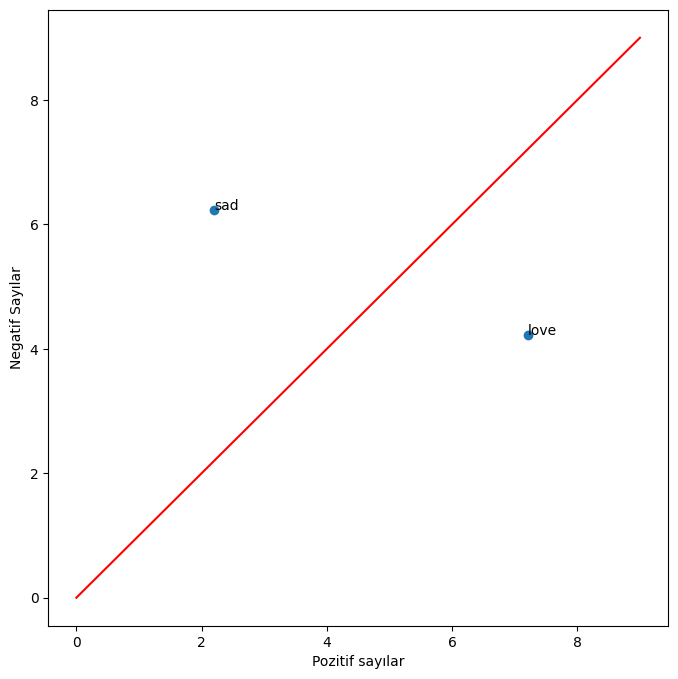

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))

word1 = "love"
word2 = "sad"

def word_features(word, freqs):
  x = np.zeros((2,))
  if (word, 1) in freqs:
    x[0] = np.log(freqs[(word, 1)] + 1)
  if (word, 0) in freqs:
    x[1] = np.log(freqs[(word, 0)] + 1)
  return x

x_axis = [word_features(word, freqs_all)[0] for word in [word1, word2]]
y_axis = [word_features(word, freqs_all)[1] for word in [word1, word2]]

ax.scatter(x_axis, y_axis)

plt.xlabel("Pozitif sayƒ±lar")
plt.ylabel("Negatif Sayƒ±lar")

ax.plot([0, 9], [0, 9], color = 'red')
plt.text(x_axis[0], y_axis[0], word1)
plt.text(x_axis[1], y_axis[1], word2)
plt.show()

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.3** Kelime √áantasƒ±

* 2.olarak Kelime √áantasƒ± tekniƒüini kullanacaƒüƒ±z.
* Tweetlerden olu≈üan bir corpus olu≈üturalƒ±m.

In [ ]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

* Scikit-Learn K√ºt√ºphanesinden CountVectorizer'ƒ± import edelim.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

* Corpusta vekt√∂rizasyon yapabilmek i√ßin bir metot olu≈üturalƒ±m.

In [ ]:
#CountVectorizer ile basit bir ≈üekilde vekt√∂rizasyon yapabiliyoruz.
#2 lambda kullanƒ±yoruz. ƒ∞lki √∂n i≈üleme i√ßin, diƒüeri tokenizasyon i≈ülemi i√ßin.

def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

* Olu≈üturduƒüumuz fonksiyona corpusu vererek vekt√∂rizasyon i≈ülemini yapalƒ±m.

In [ ]:
cv_vect = fit_cv(corpus)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


* Vekt√∂rizasyon sonucu olu≈üan featurelarƒ± alalƒ±m ve ft'de tutalƒ±m.

In [ ]:
ft = cv_vect.get_feature_names_out()

In [ ]:
print("Bu corpusta {} adet feature mevcut".format(len(ft)))
print(ft)

#G√∂r√ºld√ºƒü√º gibi, corpusta bulunan farklƒ± benzersiz kelimeleri temsil eden 13 √∂zellik vardƒ±r.

Bu corpusta 13 adet feature mevcut
['am' 'computer' 'happy' 'hate' 'i' 'lost' 'love' 'miss' 'my' 'nlp' 'sad'
 'so' 'you']


* Corpusu vectorizer kullanarak bir matrise d√∂n√º≈üt√ºrelim.

In [ ]:
cv_mtx = cv_vect.transform(corpus)

* Matrisin boyutunu g√∂relim.

In [ ]:
print("Matrix shape is: {}".format(cv_mtx.shape))

#Matrisin boyutunda ilki tweet sayƒ±sƒ±,ikinici ise corpusta ge√ßen benzersiz kelimeler.

Matrix shape is: (6, 13)


* Matrisi bir dizi haline getirelim.

In [ ]:
cv_mtx.toarray()

#Dizinin 3.satƒ±rƒ±nda 0 0 0 3 0 0 1 0 0 0 0 olduƒüunu g√∂r√ºyoruz.
#Corpusta yer alan 3.tweette hate hate hate love kelimeleri ge√ßiyor.
#3 kez hate ve 1 kez love

#Yukarƒ±da featurelara baktƒ±ƒüƒ±mƒ±zda hate 4.s√ºtunda yer alƒ±yordu.Love ise 7.s√ºtunda yer alƒ±yordu.
#Bu y√ºzden 3.satƒ±rƒ±n 4.s√ºtunu 3 ve 3.satƒ±rƒ±n 7.s√ºtunu 1.

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]])

* Yeni bir tweeti vectorizer kullanarak diziye d√∂n√º≈üt√ºrelim.

In [ ]:
new_tweet = [["lost", "lost", "miss", "miss"]]
cv_vect.transform(new_tweet).toarray()

array([[0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0]])

In [ ]:
unknown_tweet = [["John", "drives", "cars"]]
cv_vect.transform(unknown_tweet).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **3.4** Terim Frekansƒ± ve Ters D√∂k√ºman Frekansƒ± (TF-IDF)

* Yine corpusu olu≈üturalƒ±m.

In [ ]:
corpus = [["love", "nlp"],
          ["miss", "you"],
          ["hate", "hate", "hate", "love"],
          ["happy", "love", "hate"],
          ["i", "lost", "my", "computer"],
          ["i", "am", "so", "sad"]]

* Scikit-Learn k√ºt√ºphanesinden TfidfVectorizer'i import edelim.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

* Corpus ile TF-IDF vekt√∂rle≈ütiriciyi olu≈üturmak i√ßin bir fonksiyon olu≈üturalƒ±m.
* Yine 2 lambda kullanƒ±yoruz. ƒ∞lki √∂n i≈üleme i√ßin, diƒüeri tokenizasyon i≈ülemi i√ßin.

In [ ]:
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

* Vekt√∂rizazyon i≈ülemi i√ßin corpusu olu≈üturduƒüumuz fonksiyona verelim.
* D√∂n√º≈üt√ºr√ºlm√º≈ü matriside tf_mtx deƒüi≈ükeninde tutalƒ±m.

In [ ]:
tf_vect = fit_tfidf(corpus)
tf_mtx = tf_vect.transform(corpus)

* Vekt√∂rle≈ütiricinin featurelarƒ±nƒ± g√∂relim yani matrisin s√ºtunlarƒ±nƒ±.

In [ ]:
ft = tf_vect.get_feature_names_out()

In [ ]:
print("Bu corpusta {} adet feature bulunmaktadƒ±r.".format(len(ft)))
print(ft)

Bu corpusta 13 adet feature bulunmaktadƒ±r.
['am' 'computer' 'happy' 'hate' 'i' 'lost' 'love' 'miss' 'my' 'nlp' 'sad'
 'so' 'you']


* Matrisin boyutunu g√∂relim.

In [ ]:
print(tf_mtx.shape)

(6, 13)


* Matrisi diziye d√∂n√º≈üt√ºrelim.

In [ ]:
tf_mtx.toarray()

#Dizide 0-1 arasƒ±nda decimal sayƒ±lar var.

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.56921261, 0.        , 0.        , 0.82219037,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.70710678],
       [0.        , 0.        , 0.        , 0.96260755, 0.        ,
        0.        , 0.27089981, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.68172171, 0.55902156, 0.        ,
        0.        , 0.47196441, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.52182349, 0.        , 0.        , 0.42790272,
        0.52182349, 0.        , 0.        , 0.52182349, 0.        ,
        0.        , 0.        , 0.        ],
       [0.52182349, 0.        , 0.        , 0.        , 0.42790272,
        0.        , 0.     

* Decimal sayƒ±larƒ±n kullanƒ±lmasƒ±, bir kelimenin metindeki √∂nemini daha hassas bir ≈üekilde belirlememize yardƒ±mcƒ± olur. √ñrneƒüin, bir kelime belirli bir metinde √ßok sƒ±k kullanƒ±lƒ±yorsa, ona daha y√ºksek bir decimal deƒüer atanƒ±r ve b√∂ylece o kelimenin Bag of Words matrisindeki aƒüƒ±rlƒ±ƒüƒ± artar. B√∂ylece, kelimenin √∂nemi daha doƒüru bir ≈üekilde yansƒ±tƒ±lƒ±r ve metnin duygu analizi veya diƒüer doƒüal dil i≈üleme uygulamalarƒ± i√ßin daha verimli bir ≈üekilde kullanƒ±labilir.


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `B√∂l√ºm 4` Duygu Analizi Modeli

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **4.1** Train/Test Verilerinin ayrƒ±mƒ±

* X ve Y yani girdi ve √ßƒ±ktƒ±lar nasƒ±l g√∂r√ºn√ºyor bakalƒ±m.

In [ ]:
print(X)
print(y)

#Bu deƒüerleri bir √∂nceki b√∂l√ºmde olu≈üturmu≈ütuk.Artƒ±k bunlarƒ± vekt√∂rizasyon i≈üleminde kullanabiliriz.
#X'de tweetler tokenler halinde geldi.
#Y'de ise duygular var.

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['not', 'go', 'prom', 'bf', 'not', 'like', 'friend'], ['hmm'], ['charlen', 'love', 'miss'], ['sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'school', 'time', 'sleep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['annoy', 'start', '

* Scikit-Learn k√ºt√ºphanesinden train_test_split fonksiyonunu import edelim.
* Bunu, verileri train ve test olarak ayƒ±rƒ±rken kullanacaƒüƒ±z.
* ƒ∞lk olarak modeli train verileriyle eƒüiteceƒüiz, ikinci olarak test verileriyle test edeceƒüiz.Buna g√∂re modelin performansƒ±nƒ± √∂l√ßeceƒüiz.

In [ ]:
from sklearn.model_selection import train_test_split

* Verilerin %80'ini train olarak se√ßtim geri kalan %20'de test verileri oldu.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    train_size=0.80)

* Train ve Test verilerinin boyutlarƒ±nƒ± g√∂relim.

In [ ]:
print("X_train'in boyutu: {}".format(len(X_train)))
print("y_train'in boyutu: {}".format(len(y_train)))
print("\n")
print("X_test'in boyutu: {}".format(len(X_test)))
print("y_test'in boyutu: {}".format(len(y_test)))
print("\n")
print("Train veri oranƒ±: {:.0%}".format(len(X_train)/
                                        (len(X_train)+len(X_test))))

X_train'in boyutu: 14981
y_train'in boyutu: 14981


X_test'in boyutu: 3746
y_test'in boyutu: 3746


Train veri oranƒ±: 80%


* Rastgele tweetler getirelim ve her ≈üey beklendiƒüi gibi mi bakalƒ±m.

In [ ]:
import random
id = random.randint(0,len(X_train))
print("Train tweet: {}".format(X_train[id]))
print("Duygu: {}".format(y_train[id]))

Train tweet: ['hope', 'one', 'day', 'abl', 'go', 'date', 'year', 'old', 'boyfriend', 'without', 'parent']
Duygu: 1


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **4.2** Lojistik Regresyon

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.2.1** Model

* 3 Adet model olu≈üturacaƒüƒ±z ve hangisi en iyi performans metriklerine sahip ona bakacaƒüƒ±z.

* Lojistik regresyonu import edelim.

In [ ]:
from sklearn.linear_model import LogisticRegression

* Model olu≈üturan ve eƒüiten bir fonksiyon olu≈üturalƒ±m.

In [ ]:
#LogisticRegresyon ile modeli tanƒ±mlƒ±yoruz.
#Modele X_train ve y_train'i vererek eƒüitiyoruz.
#Model, girdi ve √ßƒ±ktƒ±lar arasƒ±ndaki ili≈ükiyi √∂ƒüreniyor.

def fit_lr(X_train, y_train):
  model = LogisticRegression()
  model.fit(X_train, y_train)
  return model


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px>  **4.2.2** Pozitif/Negatif Frekans

* 3.B√∂l√ºmde olu≈üturduƒüumuz Build_freqs fonksiyonunu train verisinde kullanarak frekans s√∂zl√ºƒü√º olu≈üturalƒ±m.
* Yalnƒ±zca train verisini kullanarak olu≈üturuyoruz,bunun sebebi modelin yalnƒ±zca eƒüitim verileri √ºzerinde eƒüitilmesi gerektiƒüinden veri sƒ±zƒ±ntƒ±sƒ±nƒ± √∂nlemek i√ßindir.

* Olu≈üturduƒüumuz frekans s√∂zl√ºƒü√ºn√º tweet_to_freq fonksiyonu ile kullanarak X_train ve X_test verilerini bir √∂nceki b√∂l√ºmde yaptƒ±ƒüƒ±mƒ±z gibi 2 boyutlu vekt√∂rlere d√∂n√º≈üt√ºrelim.

In [ ]:
freqs = build_freqs(X_train, y_train)
X_train_pn = [tweet_to_freq(tweet, freqs) for tweet in X_train]
X_test_pn = [tweet_to_freq(tweet, freqs) for tweet in X_test]

* fit_lr fonksiyonunu kullanarak vekt√∂rizasyon i≈üleminden ge√ßen x_train verileriyle modeli eƒüitelim.

In [ ]:
model_lr_pn = fit_lr(X_train_pn, y_train)

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.2.3** Kelime √áantasƒ±

* fit_cv fonksiyonunu train verileri √ºzerinde kullanarak Kelime √ßantasƒ± vekt√∂rizasyon y√∂ntemini kullanalƒ±m.
* Bu y√∂ntemle X_train ve X_test verilerini vekt√∂r haline d√∂n√º≈üt√ºrelim.

In [ ]:
cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


* Olu≈üturduƒüumuz bu Lojistik regresyon modelini fit_lr kullanarak eƒüitelim.

In [ ]:
model_lr_cv = fit_lr(X_train_cv, y_train)

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.2.4** TF-IDF

* ≈ûimdi TF-IDF y√∂ntemini kullanacaƒüƒ±z.
* Vekt√∂rizasyon y√∂ntemiyle olu≈üturulan yeni x_train ve x_testi tekrar eƒüiteceƒüiz.

In [ ]:
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


* Modeli fit_lr fonksiyonuyla eƒüitelim.

In [ ]:
model_lr_tf = fit_lr(X_train_tf, y_train)

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **4.3** Performans Metrikleri ve Deƒüerlendirme

* Accuracy score ve Confusion matrix'i Scikit-Learn'den import edelim.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.3.1** Pozitif/Negatif Frekans

* √ñyleyse yeni bir y tahmin deƒüi≈ükeni olu≈üturalƒ±m ve modelimizi test edelim.Bunu predict fonksiyonuyla kolaylƒ±kla yapƒ±yoruz.



In [ ]:
y_pred_lr_pn = model_lr_pn.predict(X_test_pn)

* Tahmin edilen duygularƒ± ger√ßek duygularla kar≈üƒ±la≈ütƒ±rarak modelin accuracy'sini √∂l√ßelim.

In [ ]:
print("Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_pn)))

#Bu teknikte Accuracy 77.92 √ßƒ±ktƒ±.Diƒüer tekniklerde daha iyi olabilir mi ona bakalƒ±m.

Accuracy: 77.92%


In [ ]:
# Karma≈üƒ±klƒ±k matrisini √ßizdirmek i√ßin metot olu≈üturalƒ±m.

import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Tahmin")
  plt.ylabel("Ger√ßek Deƒüer")
  plt.title("Confusion Matrix")
  return sn

* Confusion matrixi g√∂relim.

<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

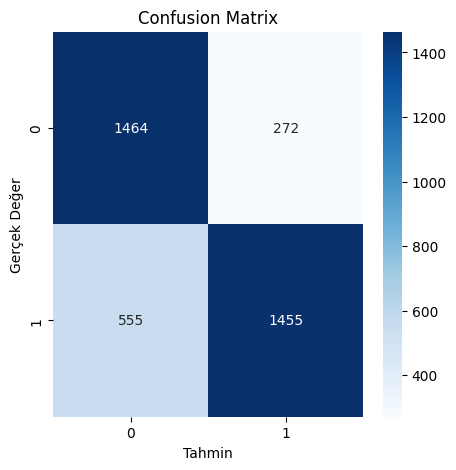

In [ ]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_pn))

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.3.2** 2.Y√∂ntem Kelime √áantasƒ±

* Kelime √áantasƒ± tekniƒüini kullanarak accuracy hesaplayalƒ±m.


In [ ]:
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)

* Accuracy'ye bakalƒ±m.

In [ ]:
print("Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_cv)))

#Kelime √ßantasƒ± y√∂ntemini kullanarak accuracy 88.55 oldu.

Accuracy: 88.55%


* Burada olu≈üan karma≈üƒ±klƒ±k matrisini g√∂relim.

<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

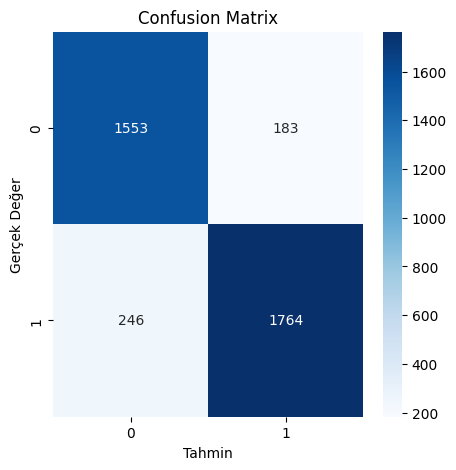

In [ ]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_cv))

#G√∂r√ºld√ºƒü√º √ºzere Kelime √ßantasƒ± y√∂nteminde True Positive ve True Negative'ler olduk√ßa y√ºksekken
#False Negatif ve False Pozitif deƒüerleri √∂nceki tekniƒüe kƒ±yasla daha d√º≈ü√ºk.

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **4.3.3** TF-IDF

* TF-IDF y√∂ntemini kullanarak accuracy hesaplayalƒ±m.



In [ ]:
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

* Accuracy'yi g√∂relim.

In [ ]:
print("Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_lr_tf)))

Accuracy: 88.65%


* Accuracy, Pozitif Negatif Frekans tekniƒüinde 77.92 √ßƒ±karken Kelime √ßantasƒ± ve TF-IDF y√∂ntemlerinde %88 civarlarƒ±nda √ßƒ±ktƒ±.
* Bu durumda Duygu analizi alanƒ±nda Kelime √áantasƒ± veya TF-IDF y√∂ntemlerini kullanmak daha y√ºksek oranda ba≈üarƒ± saƒülayacaktƒ±r.

* Karma≈üƒ±klƒ±k matrisini g√∂relim.

<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

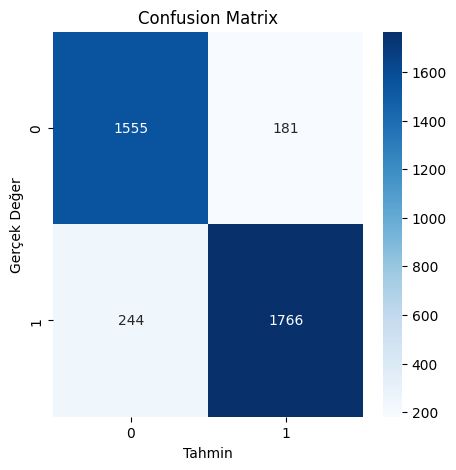

In [ ]:
plot_confusion(confusion_matrix(y_test, y_pred_lr_tf))

## **4.4** Kendi yazdƒ±ƒüƒ±mƒ±z tweetler ile deneme yapalƒ±m.


* Kendimiz bir tweet yazarak modelin √ßalƒ±≈ümasƒ±nƒ± test edelim.

In [ ]:
tweet1 = "I realized that I hate you"
tweet2 = "Sun is up. Lets go to the park and enjoy it."
tweet3 = "Dr.Fahrettin Horasan is one of the best teacher in Kƒ±rƒ±kkale University"
tweet4 = "Text mining is very interesting subject.I want to know more about it."
tweet5 = "Kƒ±rƒ±kkale University trains qualified engineers.I totally enjoy being here"
tweet6 = "This watch is very beautiful.I really loved it"

* Tweet tahmin etmek i√ßin bir metot olu≈üturalƒ±m. Metotta √∂n i≈üleme, d√∂n√º≈üt√ºrme ve tahmin a≈üamalarƒ± olacak.

In [ ]:
def predict_tweet(tweet):
  processed_tweet = process_tweet(tweet)
  transformed_tweet = tf.transform([processed_tweet])
  prediction = model_lr_tf.predict(transformed_tweet)

  if prediction == 1:
    return "Tahmin: Pozitif"
  else:
    return "Tahmin: Negatif"

* Fonksiyona tweeti g√∂nderelim ve tahmini g√∂relim.

In [ ]:
predict_tweet(tweet1)

'Tahmin: Negatif'